In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df=pd.read_csv(r"G:\My Files\Data Analyst Resources\Projects\Telecom Churn Analysis\Customer Churn.csv")

In [107]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Check For Missing Values

In [109]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Replacing Blanks with 0 as tenure is 0 this means that they have recently started the service

In [111]:
df['TotalCharges']=df['TotalCharges'].replace(" ",0)

In [112]:
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [114]:
df.duplicated().any()

False

In [115]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique Values:{col}")
    print(df[col].unique())
    print("---"*40)

Unique Values:customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
------------------------------------------------------------------------------------------------------------------------
Unique Values:gender
['Female' 'Male']
------------------------------------------------------------------------------------------------------------------------
Unique Values:Partner
['Yes' 'No']
------------------------------------------------------------------------------------------------------------------------
Unique Values:Dependents
['No' 'Yes']
------------------------------------------------------------------------------------------------------------------------
Unique Values:PhoneService
['No' 'Yes']
------------------------------------------------------------------------------------------------------------------------
Unique Values:MultipleLines
['No phone service' 'No' 'Yes']
-------------------------------------------------------------------------

In [116]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Dropped The Customer Columns as it was irrelavant to for analyze the data

In [118]:
df.drop('customerID',axis=1,inplace=True)

In [119]:
# Replaced the senior citizen column from 1,0 to Yes and no for better visualization

In [120]:
df['SeniorCitizen']=df['SeniorCitizen'].replace({0:'No',1:'Yes'})

In [121]:
# Removed all whitespaces from all the columns

In [122]:
for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].str.strip()

# Splitted the MultipleLines Column with yes or no done Feature Engineering

In [124]:
df['MultipleLines']=df['MultipleLines'].apply(lambda x : x.strip().split()[0] )

In [125]:
def tenure_period(tenure):
    if tenure<=12:
        return '0-1 year'
    elif tenure<=24:
        return '1-2 year'
    elif tenure<=48:
        return '3-4 year'
    else:
        return '4+ year'

df['TenurePeriod']=df['tenure'].apply(tenure_period)
    

In [126]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenurePeriod
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1-2 year
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,4+ year
7040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-1 year
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-1 year
7042,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No,4+ year


# 1. What percentage of customers have churned?

Text(0.5, 1.0, 'Count of churns')

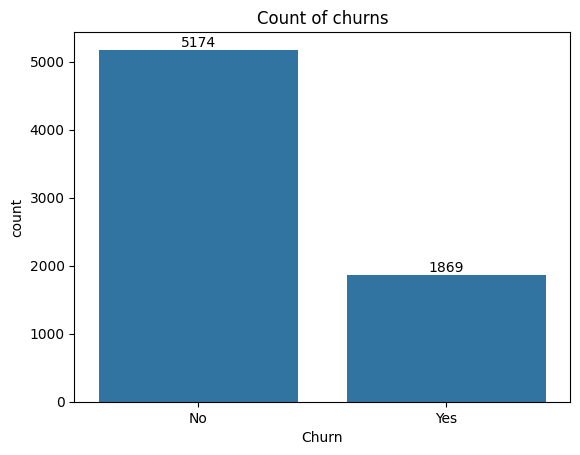

In [128]:
ax=sns.countplot(data=df,x='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of churns')

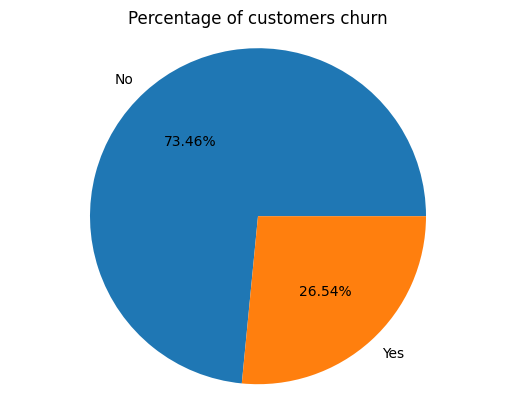

In [129]:
gp=df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gp['Churn'],labels=gp.index,autopct="%1.2f%%")
plt.title("Percentage of customers churn")
plt.axis('equal')
plt.show()


# Conclusion : Out of all customers, approximately 26% have churned. This indicates a substantial churn rate that could directly impact revenue and customer lifetime value, highlighting the need for further investigation.”


# 2)Does churn behavior differ between male and female customers? Churn by Gender

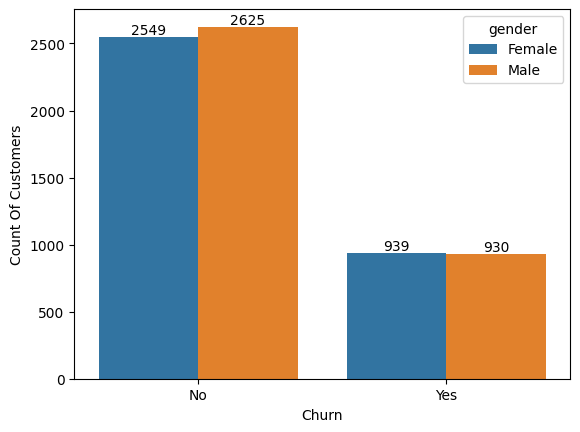

In [132]:
# ax1=sns.countplot(data=df,x='Churn',hue='gender')
# ax1.bar_label(ax1.containers[0],labels=["Male","Female"])
ax1 = sns.countplot(data=df, x='Churn', hue='gender')
for container in ax1.containers:
    ax1.bar_label(container)
plt.ylabel('Count Of Customers')

plt.show()

# Conclusion : “The churn rate is nearly identical for both male and female customers. This indicates that gender does not play a significant role in influencing customer churn. Therefore, gender can be considered a neutral factor in churn prediction for this dataset.”

# 3 Do month-to-month contract customers churn more than long-term ones? Churn by Contract Type

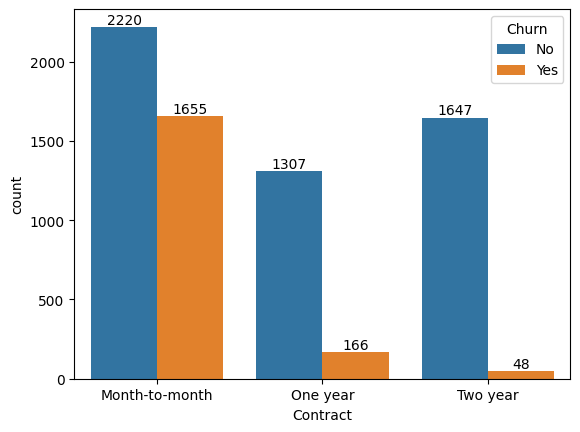

In [135]:
ax1=sns.countplot(data=df,x='Contract',hue='Churn')
for x in ax1.containers:
    ax1.bar_label(x)


# Conclusion :“Although churn is highest among Month-to-Month contract holders, it is also the most common contract type. The high churn count is partly due to volume.”

# Business Insights:  To reduce churn, efforts could focus on converting these customers to 1-year or 2-year contracts, which show better retention rates.

# 4) Are customers with shorter tenure more likely to churn? Churn by Tenure Period

In [139]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


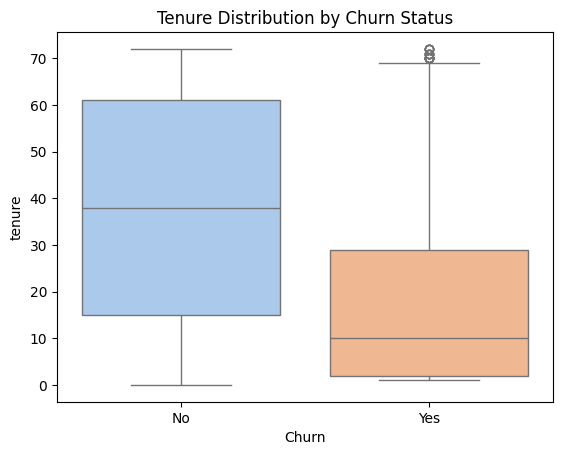

In [140]:
sns.boxplot(x='Churn', y='tenure', data=df, palette='pastel',hue='Churn')
plt.title("Tenure Distribution by Churn Status")
plt.show()


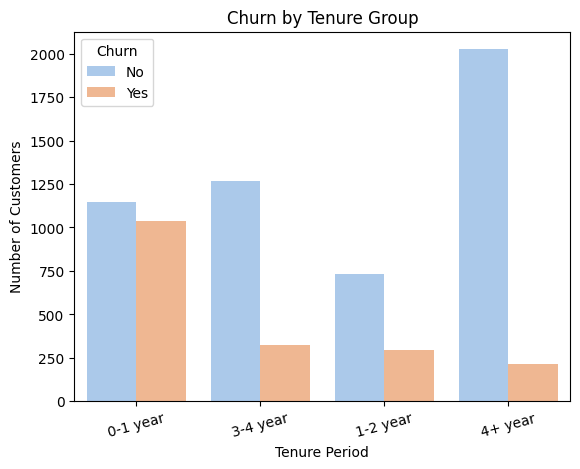

In [141]:
sns.countplot(data=df, x='TenurePeriod', hue='Churn', palette='pastel')
plt.title("Churn by Tenure Group")
plt.xlabel("Tenure Period")
plt.ylabel("Number of Customers")
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.show()

# Conclusion : “Customers with a tenure between 10 to 12 months show the highest risk of churn. This indicates that around the one-year mark, many customers are deciding to leave the service. This could point to unmet expectations, lack of engagement, or poor post-sale support during the first year.”

#  Business Recommendation:
# “Telco companies should focus retention efforts around the 10–12 month window, possibly by offering renewal discounts, personalized check-ins, or bundling incentives before customers reach the churn tipping point.”

# Task 5 - Churn by Monthly Charges

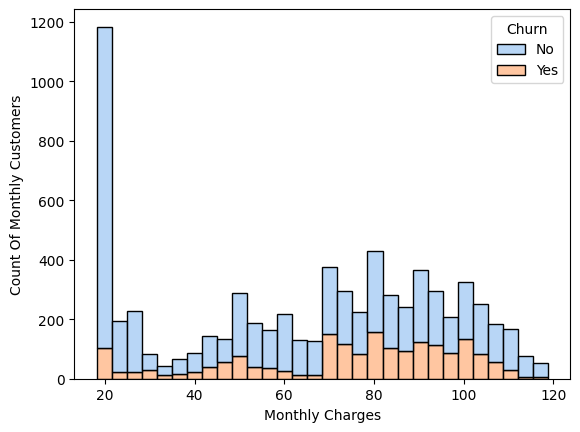

In [145]:
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',multiple='stack',palette='pastel', bins=30)
plt.xlabel('Monthly Charges')
plt.ylabel('Count Of Monthly Customers')
plt.show()

C:\Users\abhis\AppData\Local\Temp\ipykernel_23672\436459706.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='pastel')


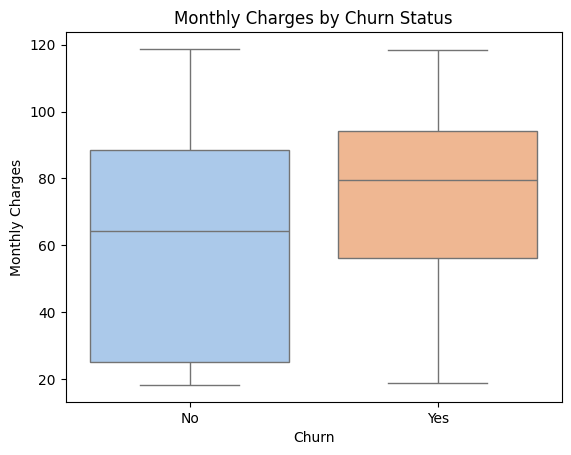

In [146]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='pastel')
plt.title("Monthly Charges by Churn Status")
plt.ylabel("Monthly Charges")
plt.show()

# Conclusion :“From the boxplot and distribution analysis, we can conclude that a significant portion of customers who churned were paying between ₹60 and ₹95 in monthly charges. This range represents the most frequent billing amount among churned customers, suggesting that mid-range paying customers may be more sensitive to price, value, or service quality.”

#  Business Insight:
# “Churn is not highest among the lowest or highest-paying customers, but rather in the mid-tier pricing segment. The company should investigate whether the services provided in this range meet customer expectations, or if pricing adjustments, bundling, or support improvements could reduce churn.”

# 6 : Are senior citizens more likely to churn?  Churn by Senior Citizen

In [150]:
# ax2=sns.countplot(data=df,x='SeniorCitizen',hue='Churn',stat='count')
# for x in ax2.containers:
#     ax2.bar_label(x)
# plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
# plt.ylabel("Count Of Customers")

In [151]:
# Conclusion : By this we can observe that there is no churn between the senior citizens 

In [152]:
gbp2=df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True)

In [153]:
gbp2 = df[df['Churn'] == 'Yes']['SeniorCitizen'].value_counts()


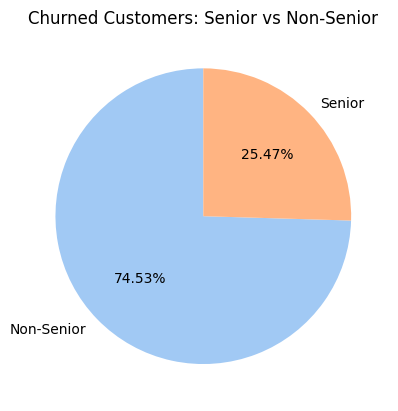

In [154]:
plt.pie(x=gbp2, 
        labels=['Non-Senior', 'Senior'], 
        autopct="%1.2f%%", 
        colors=['#a1c9f4', '#ffb482'], 
        startangle=90)
plt.title("Churned Customers: Senior vs Non-Senior")
plt.show()


# Conclusion :“Only 25% of the churned customers are senior citizens, indicating that senior citizens form a smaller portion of the overall churn pool. This suggests that churn is not driven primarily by senior customers.”

# Business Insight
# “While senior citizens do churn, they represent just a quarter of total churn cases. Therefore, churn-reduction strategies may be more impactful when focused on younger or middle-aged segments, who form the majority of the customer base and churners.”

# 7) Do customers without Tech Support churn more than those with Tech Support?  Churn by Tech Support

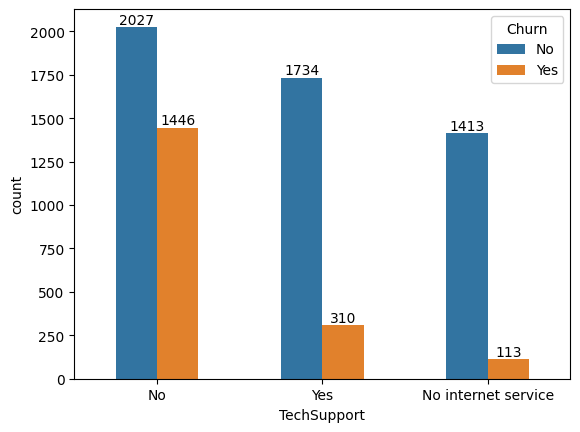

In [158]:
ax=sns.countplot(data=df,x='TechSupport',hue='Churn',width=0.5)
for x in ax.containers:
    ax.bar_label(x)

# Conclusion:“Customers who have Tech Support enabled show a significantly lower churn rate compared to those without it. This suggests that access to technical support plays an important role in customer satisfaction and retention.

# Business Insight:
# “To reduce churn, the company should consider bundling Tech Support with core services, or offer free trials to customers in their first 3–6 months.”

# 8)  Do family responsibilities reduce churn risk?  Churn by Partner and Dependents

In [162]:
column=['Partner','Dependents']

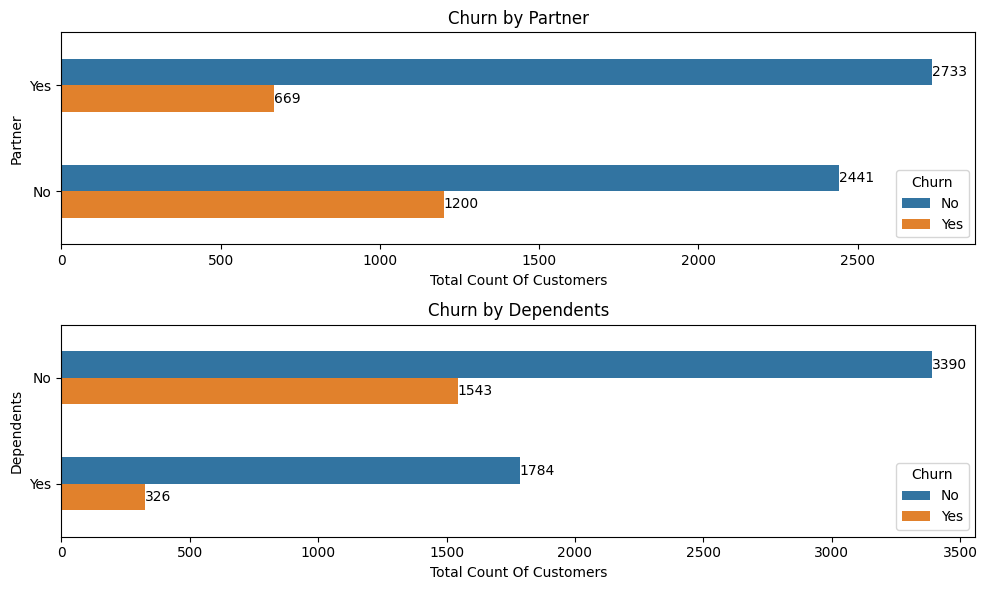

In [163]:
plt.figure(figsize=(10, 6))
for idx,x1 in enumerate(column):
    plt.subplot(2,1,idx+1)
    ax=sns.countplot(data=df,hue='Churn',y=x1,width=0.5)
    ax.set_xlabel('Total Count Of Customers')
    ax.set_ylabel(f'{x1}')
    ax.set_title(f'Churn by {x1}')
    for container in ax.containers:
        ax.bar_label(container)
        
plt.tight_layout()
plt.show()

# Conclusion: “Customers without partners or dependents are churning at higher rates. This suggests that independent users may be less loyal or more price-conscious, possibly because they don't rely on the service for family needs.”

# Business Insight
# This pattern suggests that customers who live alone or are more independent may feel less committed or are quicker to leave, perhaps due to pricing sensitivity or lack of family-driven service needs.

 # 9) Do payment method leads to churn.  Churn by Payment Method

In [167]:
pivot=df.pivot_table(values='TenurePeriod',columns='Churn',index='PaymentMethod',aggfunc='count')

In [168]:
pivot

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [169]:
pivot['ChurnRate'] = pivot['Yes'] / (pivot['Yes'] + pivot['No'])

In [170]:
pivot

Churn,No,Yes,ChurnRate
PaymentMethod,,,
Bank transfer (automatic),1286,258,0.167098
Credit card (automatic),1290,232,0.152431
Electronic check,1294,1071,0.452854
Mailed check,1304,308,0.191067


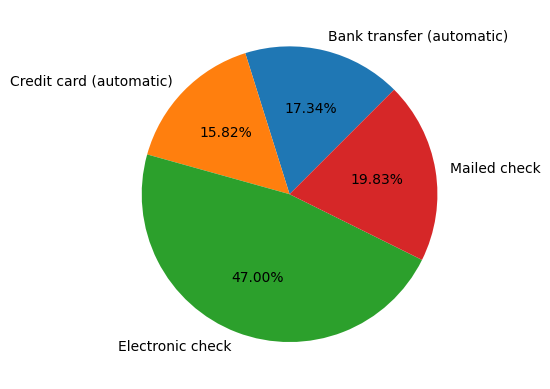

In [171]:
plt.pie(data=pivot,x='ChurnRate',labels=pivot.index,autopct='%1.2f%%',startangle=45)
plt.show()

# Conclusion: Customers who use Electronic Check as their payment method show the highest churn rate compared to other payment methods.This suggests that users who prefer manual or non-automated payments may be less engaged or more likely to discontinue services.

# Business Insight:
# Encouraging customers to switch to automatic payment methods like credit card or bank transfer may help reduce churn and improve customer retention.

# 10) Streaming Services vs Churn   Churn by Streaming Services

In [175]:
streaming=['StreamingTV','StreamingMovies']


CHurn Breakdown for Churn


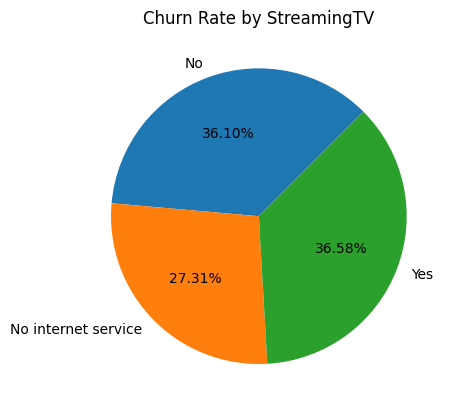


CHurn Breakdown for Churn


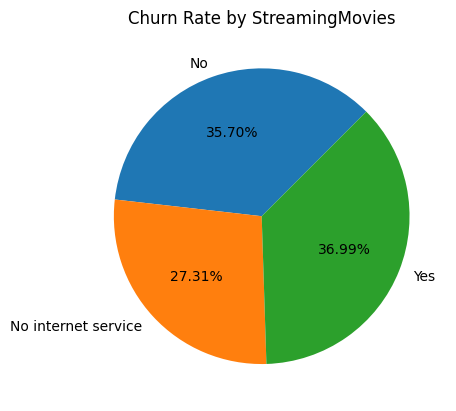

In [176]:
for column in streaming:
    grouped=df.groupby([column,'Churn']).size().reset_index(name='count')
    print(f"\nCHurn Breakdown for {col}")
    pivot=grouped.pivot(index=column,columns='Churn',values='count')
    pivot['ChurnRate']=pivot['Yes']/pivot['Yes']+pivot['No']
    for plot in col:
        plt.pie(data=pivot,x='ChurnRate',labels=pivot.index,autopct='%1.2f%%',startangle=45)
        plt.title(f'Churn Rate by {column}')
        plt.show()
        break
        

# Conclusion : Conclusion: Customers who use additional entertainment services like StreamingTV and StreamingMovies are churning at a higher rate (~37%) compared to those who don’t use them (~36%) or have no internet service (~27%). 

# Business Insight: This suggests that either the streaming experience is not satisfactory or bundled services may be overwhelming or expensive, leading to higher churn.

# 11) Services vs Churn.  Churn by Online Services

In [179]:
streamingservices=["PhoneService","MultipleLines","InternetService"]


Churn Breakdown for PhoneService


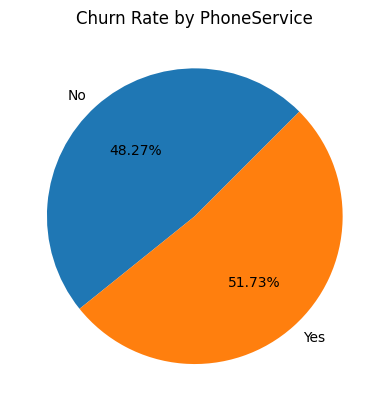


Churn Breakdown for MultipleLines


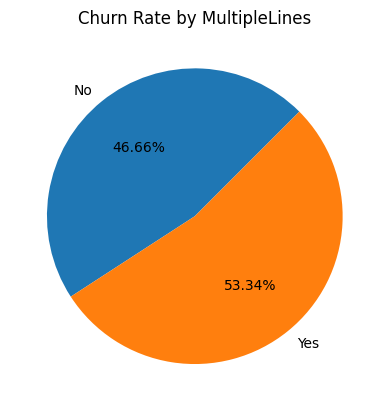


Churn Breakdown for InternetService


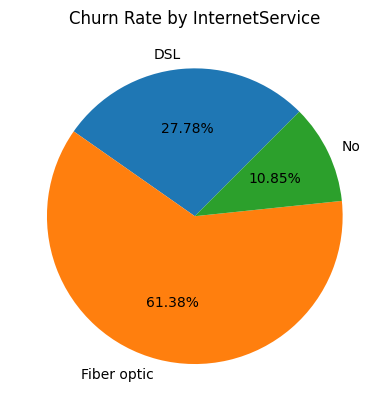

In [180]:
for col in streamingservices:
    grouped = df.groupby([col, 'Churn']).size().reset_index(name='count')
    print(f"\nChurn Breakdown for {col}")
    pivot = grouped.pivot(index=col, columns='Churn', values='count').fillna(0)
    pivot['Churn Rate'] = pivot['Yes'] / (pivot['Yes'] + pivot['No'])
    for plot in col:
        plt.pie(data=pivot,x='Churn Rate',labels=pivot.index,autopct='%1.2f%%',startangle=45)
        plt.title(f'Churn Rate by {col}')
        plt.show()
        break

## Conclusion:
## From the analysis, we observe that:
## 51.7% of customers with Phone Service have churned,
## 53.3% of those with Multiple Lines have churned, and
## 61% of customers using Internet Service have churned.


# Business Insight
## These findings suggest that customers with higher service engagement (especially Internet and Multiple Lines) are more likely to churn, possibly due to complexity, cost, or service dissatisfaction.
## This highlights an opportunity for telecom providers to:
## Improve customer support for multi-service users,
## Offer personalized retention plans, and
## Monitor Internet service quality more closely.

# 12) Paperless Billing Vs Churn

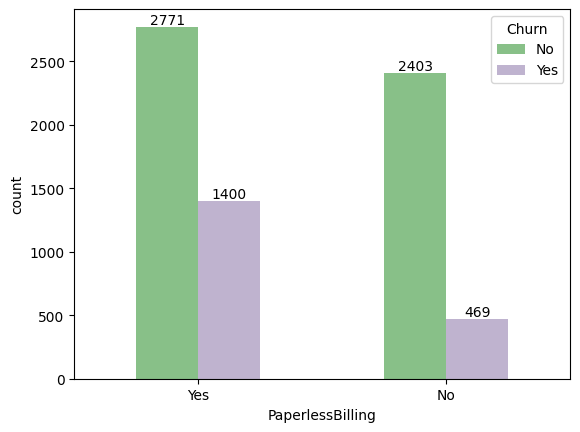

In [183]:
ax1=sns.countplot(data=df,x='PaperlessBilling',hue='Churn',palette='Accent',width=0.5)
for x in ax1.containers:
    ax1.bar_label(x)

# Conclusion:
# From the analysis, we observe that customers who are using Paperless Billing are churning more compared to those who receive traditional paper bills.
# This suggests that paperless billing customers might be dissatisfied with online payment processes, bill clarity, or digital communication.
# It may also indicate that these customers are more digitally aware and willing to switch providers easily if they find better options.

# Business Recommendation:
# The company should investigate potential issues in billing transparency, payment portals, or communication clarity for paperless billing users to improve retention in this segment.

# 13) Online services vs CHurn

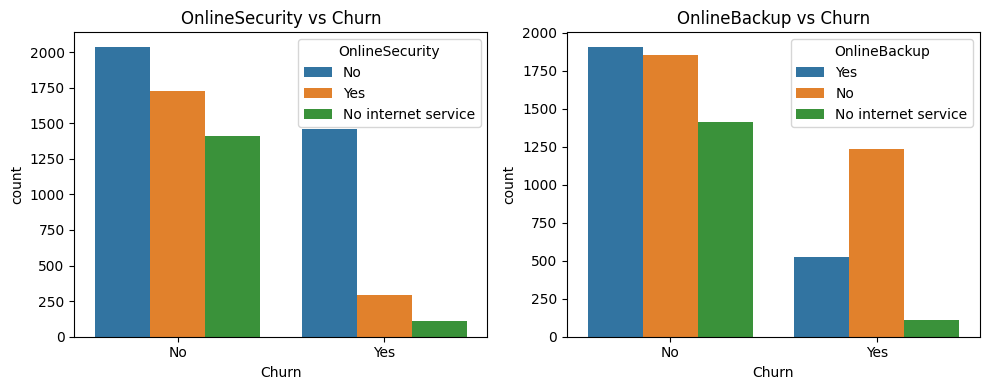

In [187]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(data=df, x='Churn', hue='OnlineSecurity')
plt.title('OnlineSecurity vs Churn')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Churn', hue='OnlineBackup')
plt.title('OnlineBackup vs Churn')

plt.tight_layout()


 # Conclusion : This states that Customers who are not using Online security churn more their chances of leaving is more and customers who don't have online backup are more 

# Recommendation : 
# Promote these services through bundled offers or targeted marketing to reduce churn and enhance customer loyalty.

In [190]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenurePeriod
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3-4 year
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year
3,Male,No,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 year
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1-2 year
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,4+ year
7040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-1 year
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-1 year


In [191]:
df.to_csv('Telecom Dataset Cleaned.csv',index=False)